<ipython-input-23-01c8604680a1>:101: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


Time taken: 0.12865519523620605
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp0.jpg
Time taken: 0.1655571460723877
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp1.jpg
Time taken: 0.20844221115112305
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp2.jpg
Time taken: 0.26323747634887695
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp3.jpg
Time taken: 0.31116795539855957
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp4.jpg
Time taken: 0.35804224014282227
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp5.jpg
Time taken: 0.42250990867614746
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp6.jpg
Time taken: 0.4552931785583496
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp7.jpg
Time taken: 0.6587467193603516
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp8.jpg
Time taken: 0.5674922466278076
C:\Users\lenovo\OneDrive\Documents\C

Time taken: 4.210489273071289
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp80.jpg
Time taken: 4.237717390060425
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp81.jpg
Time taken: 4.26829195022583
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp82.jpg
Time taken: 4.316494464874268
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp83.jpg
Time taken: 4.3772900104522705
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp84.jpg
Time taken: 4.534952163696289
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp85.jpg
Time taken: 4.563887357711792
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp86.jpg
Time taken: 4.57274317741394
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp87.jpg
Time taken: 4.717378854751587
C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp88.jpg
Time taken: 4.769474744796753
C:\Users\lenovo\OneDrive\Documents\College D

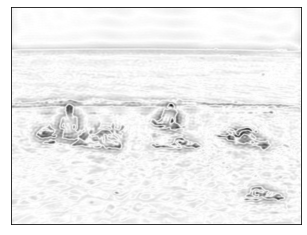

In [23]:
#import libraries 
import os
import cv2
import matplotlib.pyplot as plt
import re
import numpy as np
import time

# Dividing dataset into tampered and original

"""
I. Amerini, L. Ballan, R. Caldelli, A. Del Bimbo, G. Serra. 
“A SIFT-based forensic method for copy-move attack detection and transformation recovery”, 
IEEE Transactions on Information Forensics and Security, vol. 6, issue 3, pp. 1099-1110, 2011.
"""

image_paths = [] #List to store path of all images
file_paths = []

for dirname, _, filenames in os.walk('C:\\Users\\lenovo\\OneDrive\\Documents\\College Documents\\MICC-F220'):
    for filename in filenames:
        if '.txt' in filename:
            continue
        image_paths.append(os.path.join(dirname, filename))

original_images=[]
tampered_images=[]

for path in image_paths:
    if 'tamp' in path:              # As Observed from the above list tampered images name has tamp
        tampered_images.append(path)
    else:
        original_images.append(path)
        
def plot_image(img,size=(8,8)):
    plt.figure(figsize = size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 


def siftDetector(img):
    sift = cv2.xfeatures2d.SIFT_create()
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    key_points, descriptors = sift.detectAndCompute(gray, None)
    return key_points,descriptors

def get_original(tampered):
    name=re.findall(r'.*/(.*)tamp.*',tampered)
    original_index=-1
    if len(name)<1:
        return -1
    for index,names in enumerate(original_images):
        if name[0] in names:
            original_index=index
            break
            
    if original_index==-1:
        return original_index,-1
    else:
        image=cv2.imread(original_images[original_index])
        return image,original_index

def show_sift_features(color_img, kp,size=(8,8)):
    gray_img=cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    plt.figure(figsize = size)
    plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

def image_fft(img, destination):
    dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))

#    Code for high pass filter commented    
#    rows, cols = img.shape
#    crow, ccol = int(rows / 2), int(cols / 2)  # center
#    
#    # Circular HPF mask, center circle is 0, remaining all ones
#    
#    mask = np.ones((rows, cols, 2), np.uint8)
#    r = 80
#    center = [crow, ccol]
#    x, y = np.ogrid[:rows, :cols]
#    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
#    mask[mask_area] = 1
#    using band-pass filter

    rows, cols = img.shape
    crow, ccol = int(rows / 2), int(cols / 2)
    
    mask = np.zeros((rows, cols, 2), np.uint8)
    r_out = 80
    r_in = 10
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
    mask[mask_area] = 1
    
    # apply mask and inverse DFT
    fshift = dft_shift * mask
    
    fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
    
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv2.idft(f_ishift)
    img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

    plt.imshow(img_back, cmap='binary'), plt.xticks([]), plt.yticks([])
    plt.savefig(destination, bbox_inches='tight')
    
#    plt.subplot(2, 2, 1), plt.imshow(img, cmap='gray')
#    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
#    plt.subplot(2, 2, 2), plt.imshow(magnitude_spectrum, cmap='gray')
#    plt.title('After FFT'), plt.xticks([]), plt.yticks([])
#    plt.subplot(2, 2, 3), plt.imshow(fshift_mask_mag, cmap='gray')
#    plt.title('FFT + Mask'), plt.xticks([]), plt.yticks([])
#    plt.subplot(2, 2, 4), 
#    plt.title('After FFT Inverse'), 
#    plt.show()

        
tampered_images.sort()
original_images.sort()
count = 0
total_time = 0

for image in tampered_images:
    start = time.time()
    
    tamp = cv2.imread(image,0)
    dest = r'C:\Users\lenovo\OneDrive\Documents\College Documents\Tampered\tamp' + str(count) + '.jpg'
    image_fft(tamp, dest)
    
    end = time.time()
    total_time += (end-start) 
    print("Time taken: {}".format(end-start))
    
    count += 1
    print(dest)

print("\nTotal time taken: {}".format(total_time))
print("\nNumber of original images: {}\nNumber of tampered images: {}".format(len(original_images),len(tampered_images)))